In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/diabetes/diabetic_data.csv
/kaggle/input/diabetes/description.pdf


**Importing necessary packages**

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

****Data Preparation & Exploration****

In [3]:
df=pd.read_csv('/kaggle/input/diabetes/diabetic_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

* **Encounter ID**: Unique identifier of an encounter
* **Patient number**: Unique identifier of a patient
* **Race Values**: Caucasian, Asian, African American, Hispanic, and other
* **Gender Values**: male, female, and unknown/invalid
* **Age** Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**: Weight in pounds
* **Admission type**: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**: Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**: Integer number of days between admission and discharge
* **Payer code** : Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**: Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**: Number of lab tests performed during the encounter
* **Number of procedures**: Numeric Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**: Number of distinct generic names administered during the encounter
* **Number of outpatient visits**: Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**: Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**: Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3**: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses** : Number of diagnoses entered to the system 0%
* **Glucose serum test** : result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result** : Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications** : Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications** : Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted** : Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Ok, now that we have a glimpse of the data, let's explore them.

First ,we will remove ID columns because this will not contribute to our model

In [6]:
#removing id columns
df.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

Removing Columns which contain unique values

In [7]:
list_unique_columns=[]
for i in df.columns:
    if len(df[i].value_counts())==1:
        list_unique_columns.append(i)
for i in list_unique_columns:
    df.drop([i],axis=1,inplace=True)    

In our dataset, we have '?' as a value for many records so replace it with nan.

In [8]:
#replace ? with nan
df=df.replace('?',np.nan)  

Let's check whether our data has missing values

In [9]:
#missing value function
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return tt    

missing_data(df)['Percent'].sort_values(ascending=False)

weight                      96.858479
medical_specialty           49.082208
payer_code                  39.557416
race                         2.233555
diag_3                       1.398306
diag_2                       0.351787
diag_1                       0.020636
num_medications              0.000000
max_glu_serum                0.000000
number_diagnoses             0.000000
number_inpatient             0.000000
number_emergency             0.000000
number_outpatient            0.000000
num_lab_procedures           0.000000
num_procedures               0.000000
diabetesMed                  0.000000
time_in_hospital             0.000000
admission_source_id          0.000000
discharge_disposition_id     0.000000
admission_type_id            0.000000
age                          0.000000
gender                       0.000000
A1Cresult                    0.000000
readmitted                   0.000000
repaglinide                  0.000000
nateglinide                  0.000000
change      

As we can see above the dataset,Weight column has 96% of missing values followed by medical_specialty(49%) and payer code(39%)

**Null Handling**

In [10]:
#weight column since it has more missing value 
df['weight'].value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

Since weight is not filled often we are creating new flag column and dropping original column

In [11]:
df['has_weight']=df['weight'].notnull().astype('int')
df.drop(['weight'],axis=1,inplace=True)

Analyzing medical_speciality column

In [12]:
df['medical_specialty'].isnull().sum()
df['medical_specialty']=df['medical_specialty'].fillna('UNK') #filling null with unk
print(df['medical_specialty'].nunique()) #more categories

73


In [13]:
print(df['medical_specialty'].value_counts())

UNK                                 49949
InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
                                    ...  
Perinatology                            1
Psychiatry-Addictive                    1
Proctology                              1
Surgery-PlasticwithinHeadandNeck        1
Pediatrics-InfectiousDiseases           1
Name: medical_specialty, Length: 73, dtype: int64


Since many categories has less sample we will change the column into the top 10 specialities and then an other category

In [14]:
top_10=['UNK','InternalMedicine',
        'Emergency/Trauma','Family/GeneralPractice','Cardiology','Surgery-General',
        'Nephrology','Orthopedics','Orthopedics-Reconstructive','Radiologist']

df.loc[~df['medical_specialty'].isin(top_10),'medical_specialty']='Other'

Analyzing payer_code column

In [15]:
print(df['payer_code'].isnull().sum())

print(df['payer_code'].value_counts())

df['payer_code']=df['payer_code'].fillna('UNK') #filling null with unk

40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64


Analyzing race column

In [16]:
df['race'].isnull().sum()
df['race'].value_counts()

df['race']=df['race'].fillna('UNK') #filling null with unk

**Feature engineering** 

The features you use influence more than everything else the result. No algorithm alone, to my knowledge, can supplement the information gain given by correct feature engineering.
-Luca Massaron

In [17]:
#Generating output variable
#we need to check whether a patient admitted within 30 days or not
df['target']=(df['readmitted']=='<30').astype('int')

#dropping readmitted column
df.drop(['readmitted'],axis=1,inplace=True)

Analyzing and encoding age column

In [18]:
print(df['age'].value_counts())

cleanup_age = {"age":     {"[0-10)": 0, "[10-20)": 10,"[20-30)": 20,"[30-40)": 30,"[40-50)": 40,"[50-60)": 50,
    "[60-70)": 60,"[70-80)": 70,"[80-90)": 80,"[90-100)": 90}}

df.replace(cleanup_age, inplace=True)

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


In [19]:
#analyzing gender column
df['gender'].value_counts()
#removing invalid/unknown entries for gender
df=df[df['gender']!='Unknown/Invalid']

* **EDA**
* **Data visualization**

**Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations**

Text(0.5, 1.0, 'Distrinution of Readmission')

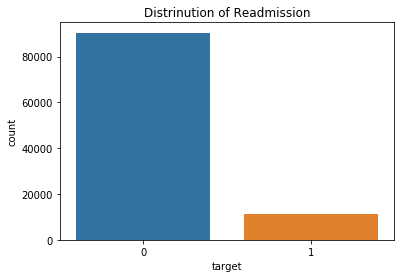

In [20]:
#Distribution of Readmission
sns.countplot(df['target']).set_title('Distrinution of Readmission')

**Insight from above graph**: Our target variable is imbalance. Number of readmitted patient are quite less as compared to Not readmitted

In [21]:
#checking for balance data
print(sum(df['target'].values)/len(df['target'].values)) 

0.11160244882717688


**NOTE**:Only 11% is re hospitalized so this is imbalance dataset

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

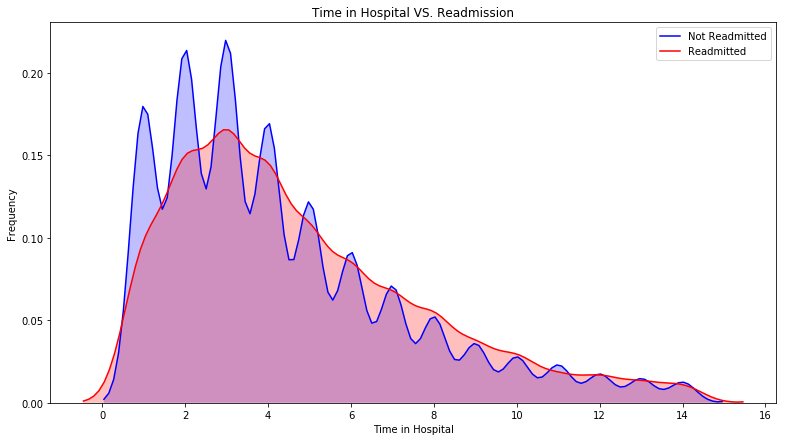

In [22]:
#time in hospital vs readmitted
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['target'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['target'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

**Insight from above graph**: If no of days in hospital increased readmission rate is getting decreased.Mostly patient between 3 to 4 days are admitted frequently

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

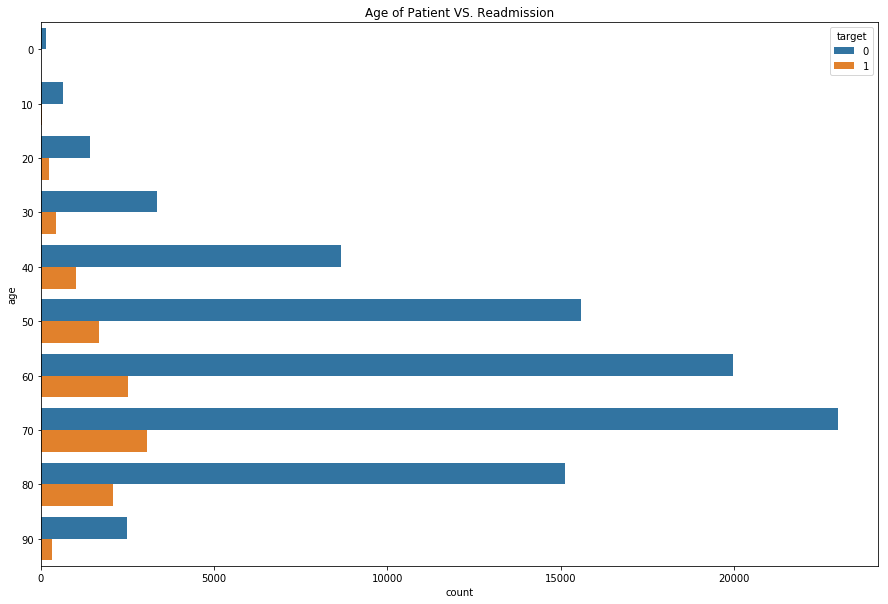

In [23]:
#age vs readmission

fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['target']).set_title('Age of Patient VS. Readmission')

**Insight from above graph**: Patient with age 60 and 70 have more readmission

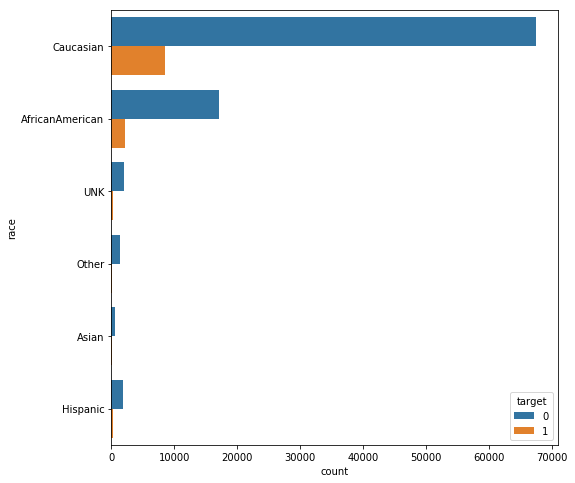

In [24]:
#race vs readmission

fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['target'])

**Insight from above graph** : Caucasian race has more readmission

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

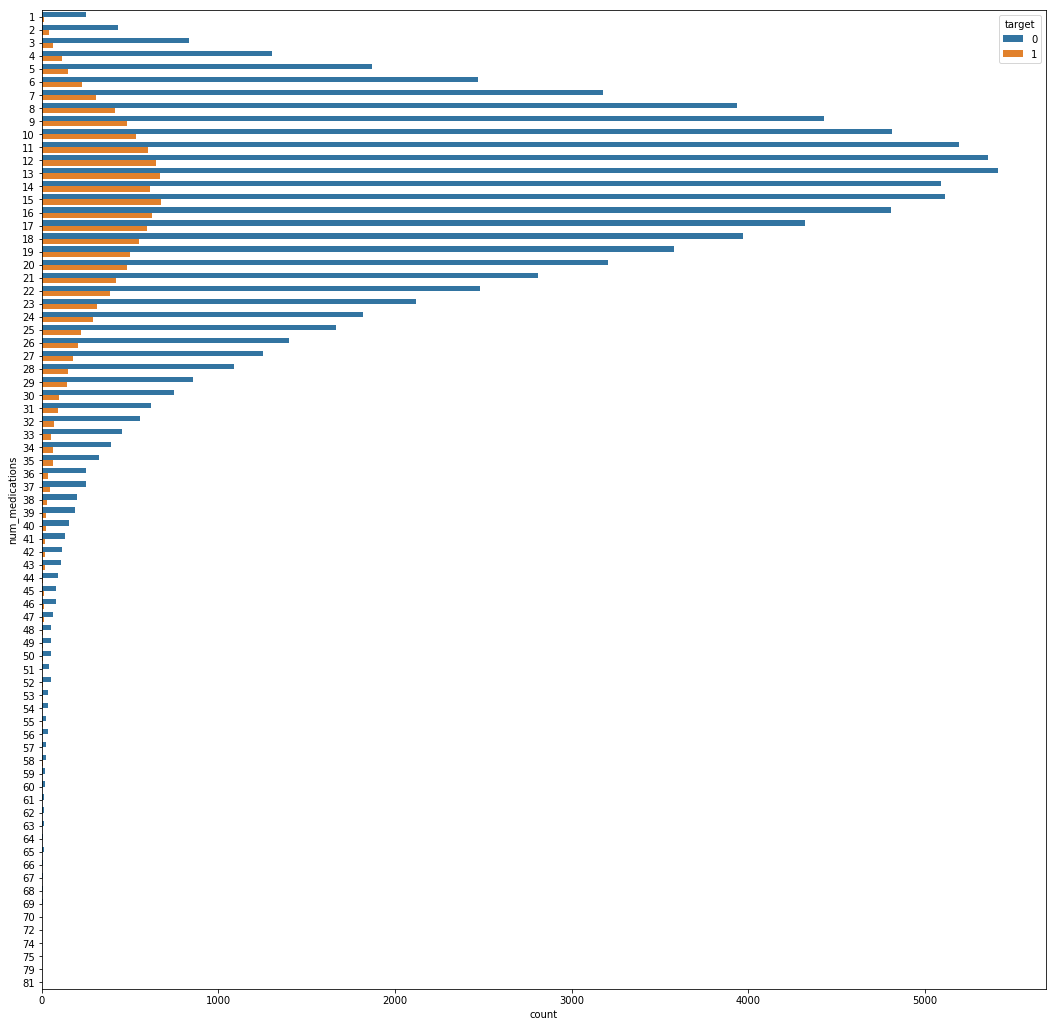

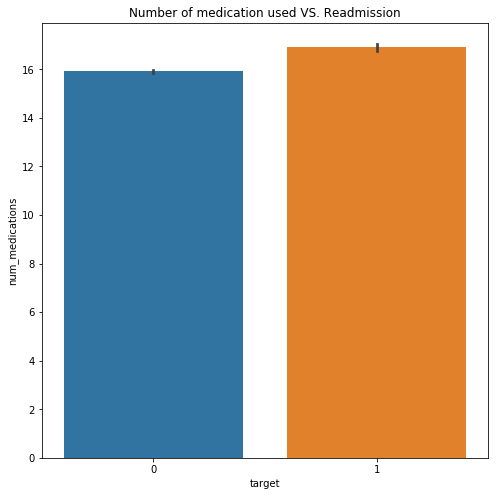

In [25]:
#Number of medication used VS. Readmission
fig = plt.figure(figsize=(18,18))
sns.countplot(y = df['num_medications'], hue = df['target'])
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['target'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

**Insight from above graph** : If number of medications between 10 and 20 there is more chances that patient will admit again

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

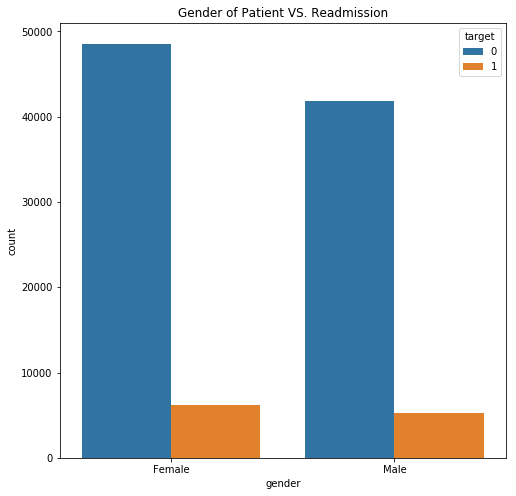

In [26]:
#Gender and Readmission
#Male = 1
#Female = 0

fig = plt.figure(figsize=(8,8))
sns.countplot(df['gender'], hue = df['target']).set_title("Gender of Patient VS. Readmission")

**Insight from above graph** : Readmission rate of both male and female looks similar

Text(0.5, 1.0, 'Change of Medication VS. Readmission')

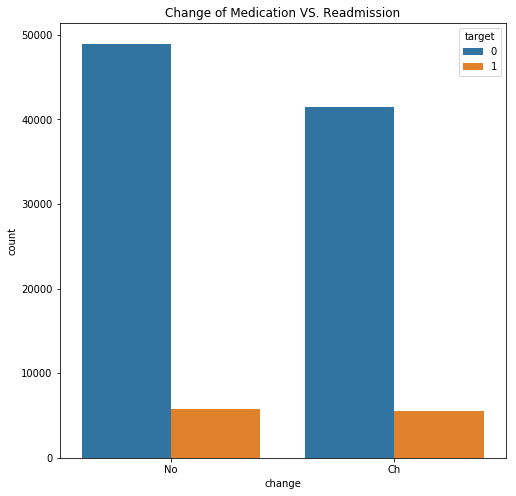

In [27]:
#change of medication vs readmission

fig = plt.figure(figsize=(8,8))
sns.countplot(df['change'], hue = df['target']).set_title('Change of Medication VS. Readmission')

**Insight from above graph** :Readmission rate looks similar wheteher the change of mediacation occurs or not

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

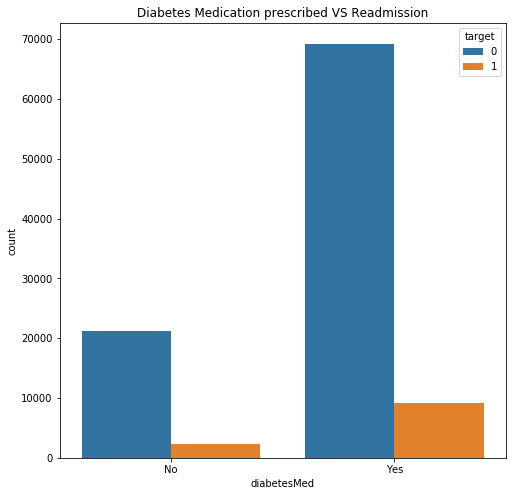

In [28]:
#diabetic medication vs readmission

fig = plt.figure(figsize=(8,8))
sns.countplot(df['diabetesMed'], hue = df['target']).set_title('Diabetes Medication prescribed VS Readmission')

**Insight from above graph** : Patients provided with diabetes medication readmitted often

**Glucose Serum test** - A blood glucose test is used to find out if your blood sugar levels are in the healthy range. It is often used to help diagnose and monitor diabetes.

**'>200'** :  = indicates diabetes
**'>300'** :  = Indicates diabetes
**'Norm'** :  = Normal
**'None'** :  = test was not taken

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

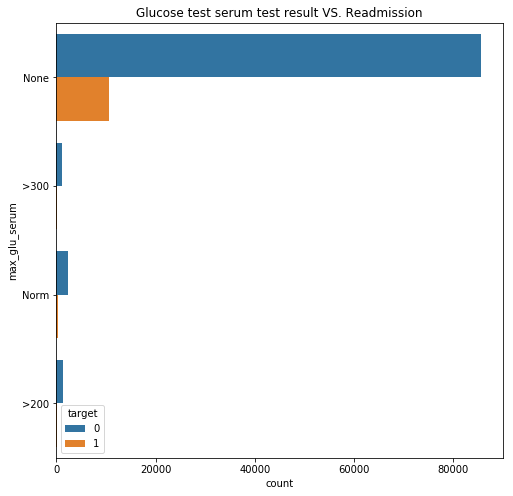

In [29]:
#max_glue_serum vs target
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['max_glu_serum'], hue = df['target']).set_title('Glucose test serum test result VS. Readmission')

**Insight from above graph** : Patient who doen't take max glue serum test is readmitted often

**A1C result and Readmission A1C test** - The A1C test is a blood test that provides information about your average levels of blood glucose, also called blood sugar, over the past 3 months



* **'>7'** :1
* **'>8'** :1
* **Norm ** : 0 = Normal
* **None ** : -99 = Test was not taken

Text(0.5, 1.0, 'A1C test result VS. Readmission')

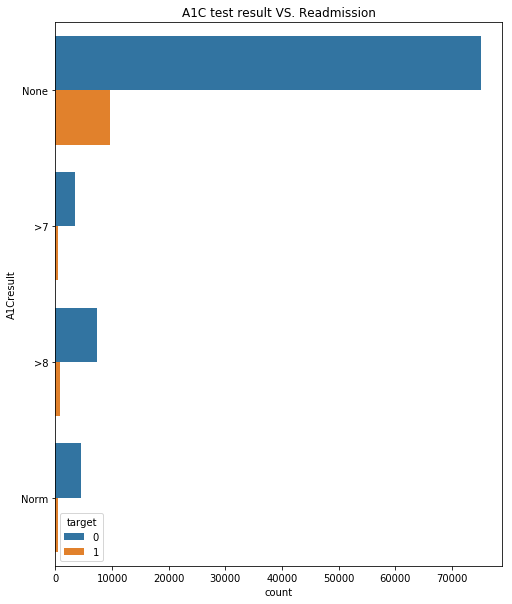

In [30]:
#a1c test result vs target
fig = plt.figure(figsize=(8,10))
sns.countplot(y= df['A1Cresult'], hue = df['target']).set_title('A1C test result VS. Readmission')

**Insight from above graph** : Patient who doen't take a1ctest is readmitted often

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

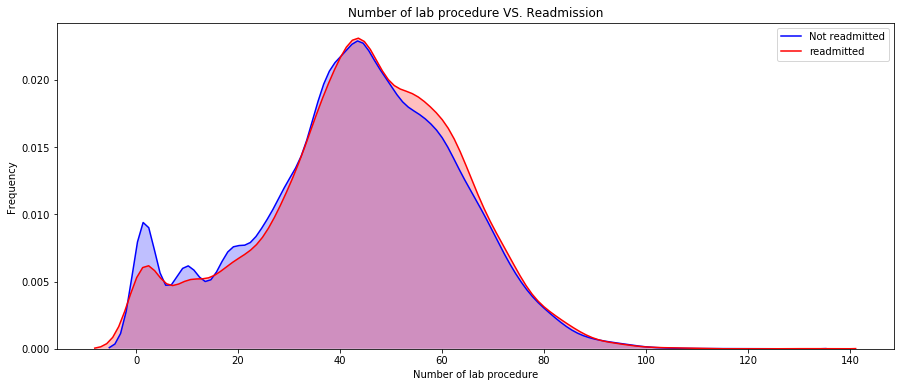

In [31]:
#no of lab procedure vs target
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['target'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['target'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

**Insight from above graph** : Both  admission and  readmission have similar pattern for number of lab procedures

Text(0.5, 1.0, 'admission_type_id VS. Readmission')

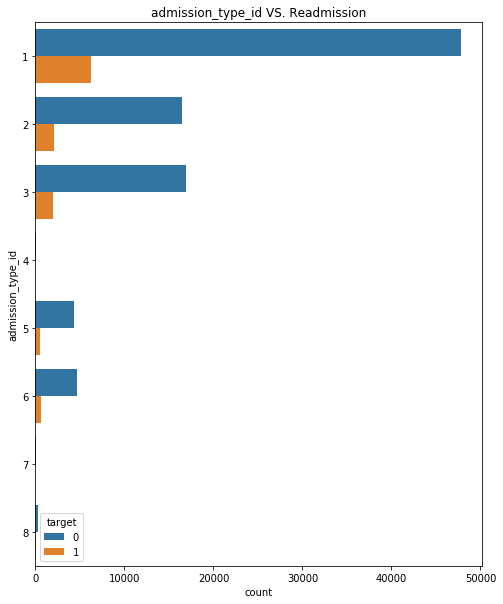

In [32]:
#admission type vs readmission
#1-	Emergency
#2-Urgent
#3-Elective
#4-Newborn
#5-Not Available
#6-NULL
#7-Trauma Center
#8-Not Mapped

fig = plt.figure(figsize=(8,10))
sns.countplot(y= df['admission_type_id'], hue = df['target']).set_title('admission_type_id VS. Readmission')

**Insight from above graph** : Patient who admitted as emergency has more readmission 

Text(0.5, 1.0, 'discharge_disposition_id VS. Readmission')

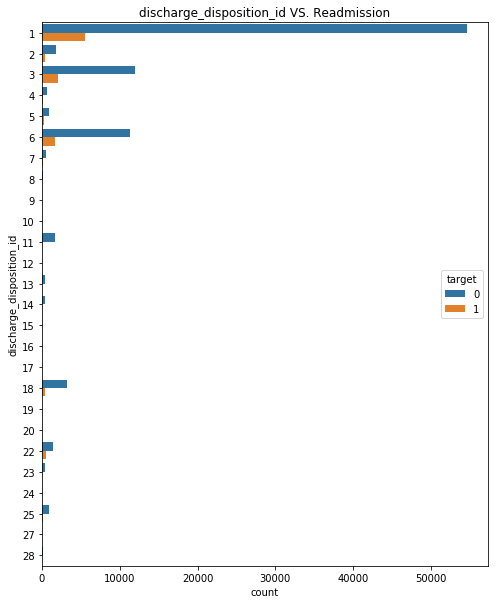

In [33]:
#discharge_disposition_id VS. Readmission
fig = plt.figure(figsize=(8,10))
sns.countplot(y= df['discharge_disposition_id'], hue = df['target']).set_title('discharge_disposition_id VS. Readmission')

**Insight from above graph** : Patient who discharged to home has more readmission rate

**Label Encoding**

In [34]:
categorical_feature=df.select_dtypes(include='object')
cat=categorical_feature.columns
print(cat)

Index(['race', 'gender', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')


Taking categorical Columns

**Removing diag_ columns bcoz it is categorical and have more levels , this is handled by grouping which is done in later part**

In [35]:
cat=['race', 'gender', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

In [36]:
#taking copy of dataframe
df_copy=df.copy()

**Numeric and categorical columns**: 'admission_type_id','discharge_disposition_id','admission_source_id'

In [37]:
cols_cat_num=['admission_type_id','discharge_disposition_id','admission_source_id']
df[cols_cat_num]=df[cols_cat_num].astype('str')
df_cat=pd.get_dummies(df[cat+cols_cat_num],drop_first=True)

In [38]:
print(df_cat.columns)

Index(['race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'race_UNK', 'gender_Male', 'payer_code_CH', 'payer_code_CM',
       'payer_code_CP', 'payer_code_DM',
       ...
       'admission_source_id_20', 'admission_source_id_22',
       'admission_source_id_25', 'admission_source_id_3',
       'admission_source_id_4', 'admission_source_id_5',
       'admission_source_id_6', 'admission_source_id_7',
       'admission_source_id_8', 'admission_source_id_9'],
      dtype='object', length=137)


In [39]:
#dropping encoded columns
for i in cat:
    df_copy.drop([i],axis=1,inplace=True)

In [40]:
#concating encoded columns and other columns
df_copy=pd.concat([df_copy,df_cat],axis=1)

**Checking diag columns**

In [41]:
df_copy['diag_3'].isnull().sum()
df_copy.dropna(inplace=True)
print(df_copy['diag_1'].nunique())
print(df_copy['diag_2'].nunique())
print(df_copy['diag_3'].nunique())


715
743
789


**Based on icd(international classification of disease) codes we group some disease**

In [42]:
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    df_copy[col] = df_copy[col].str.replace('E','-')
    df_copy[col] = df_copy[col].str.replace('V','-')
    condition = df_copy[col].str.contains('250')
    df_copy.loc[condition,col] = '250'

df_copy[diag_cols] = df_copy[diag_cols].astype(float)

In [43]:
# diagnosis grouping
for col in diag_cols:
    df_copy['temp']=np.nan
    
    condition = df_copy[col]==250
    #condition = df_copy['diag_1']==250
    df_copy.loc[condition,'temp']='Diabetes'
    
    condition = (df_copy[col]>=390) & (df_copy[col]<=458) | (df_copy[col]==785)
    df_copy.loc[condition,'temp']='Circulatory'
    
    condition = (df_copy[col]>=460) & (df_copy[col]<=519) | (df_copy[col]==786)
    df_copy.loc[condition,'temp']='Respiratory'
    
    condition = (df_copy[col]>=520) & (df_copy[col]<=579) | (df_copy[col]==787)
    df_copy.loc[condition,'temp']='Digestive'
    
    condition = (df_copy[col]>=580) & (df_copy[col]<=629) | (df_copy[col]==788)
    df_copy.loc[condition,'temp']='Genitourinary'
    
    condition = (df_copy[col]>=800) & (df_copy[col]<=999)
    df_copy.loc[condition,'temp']='Injury'
    
    condition = (df_copy[col]>=710) & (df_copy[col]<=739)
    df_copy.loc[condition,'temp']='Muscoloskeletal'
    
    condition = (df_copy[col]>=140) & (df_copy[col]<=239)
    df_copy.loc[condition,'temp']='Neoplasms'
    
    condition = df_copy[col]==0
    df_copy.loc[condition,col]='?'
    df_copy['temp']=df_copy['temp'].fillna('Others')
    condition = df_copy['temp']=='0'
    df_copy.loc[condition,'temp']=np.nan
    df_copy[col]=df_copy['temp']
    df_copy.drop('temp',axis=1,inplace=True)

In [44]:
#ENCODING DIAG_ COLUMNS
df_cat_diag=pd.get_dummies(df_copy[diag_cols],drop_first=True)

#dropping encoded columns
for i in diag_cols:
    df_copy.drop([i],axis=1,inplace=True)

df_copy=pd.concat([df_copy,df_cat_diag],axis=1)

**Model Building**

In [45]:
X=df_copy.drop(['target'],axis=1)
y=df_copy['target']

**Logistic Regression**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l2')
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)

Accuracy is 0.89
Precision is 0.50
Recall is 0.02


**Decision Tree**

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)

Accuracy is 0.83
Precision is 0.18
Recall is 0.13


**Feature Importance for Decision Tree**

                     Feature  Importance
9           number_emergency    0.015948
8          number_outpatient    0.022010
2   discharge_disposition_id    0.024318
11          number_diagnoses    0.032745
6             num_procedures    0.038152
0                        age    0.041743
4           time_in_hospital    0.053097
10          number_inpatient    0.054223
7            num_medications    0.092284
5         num_lab_procedures    0.117542


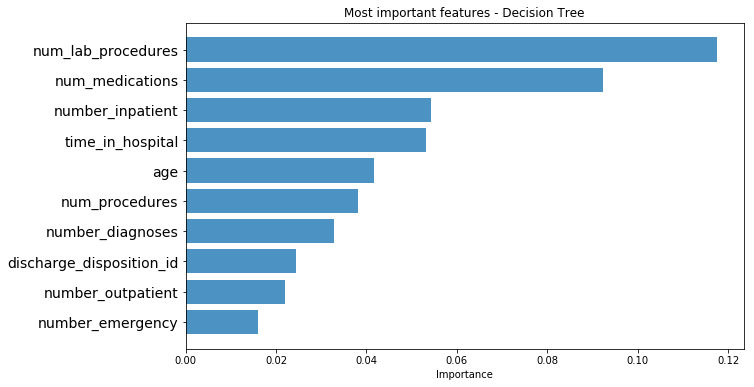

In [48]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()


**Random Forest**

In [49]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

rm_prd = rm.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)

Accuracy is 0.89
Precision is 0.59
Recall is 0.01


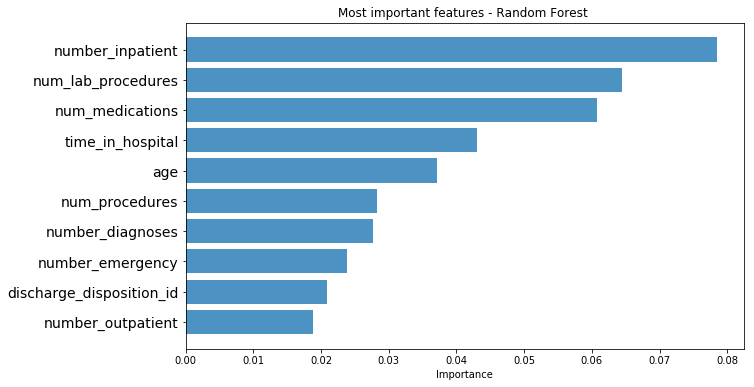

In [50]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

**Model Comparision**

**Accuracy**

([<matplotlib.axis.XTick at 0x7fdac12305f8>,
 <a list of 3 Text xticklabel objects>)

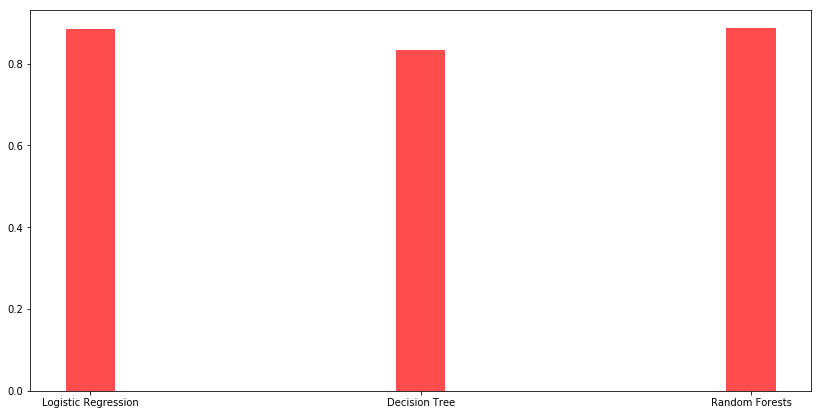

In [51]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [accuracy_logit, accuracy_dtree, accuracy_rm]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)

**Precision**

([<matplotlib.axis.XTick at 0x7fdac1184b00>,
 <a list of 3 Text xticklabel objects>)

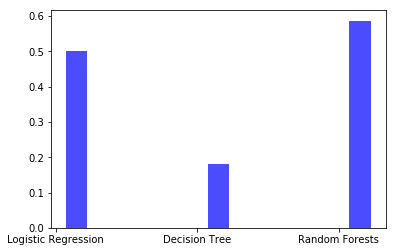

In [52]:
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [precision_logit, precision_dtree, precision_rm]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)

**Recall**

Text(0.5, 1.0, 'Model')

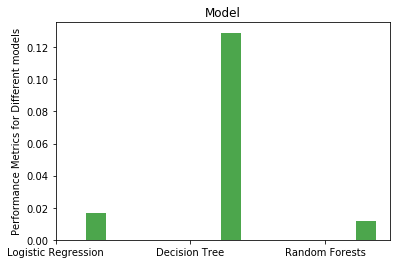

In [53]:
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests' ]
values = [recall_logit, recall_dtree, recall_rm, ]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')